<a href="https://colab.research.google.com/github/S-Osman4/Lux_Academy-Data_Analysis/blob/main/Week_2_Data_Analysis_Challenge_Weather_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install kaggle

*The code above installs the Kaggle API client. This allows you to interact with Kaggle datasets and competitions directly from your Colab notebook.*

In [6]:
! kaggle datasets download ayushmi77al/weather-data-set-for-beginners

Dataset URL: https://www.kaggle.com/datasets/ayushmi77al/weather-data-set-for-beginners
License(s): unknown
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 57.7MB/s]


*Downloading the Dataset:
This code downloads the "Weather Data Set for Beginners" dataset from Kaggle using the Kaggle API client.
The dataset will be saved in a zip file.*

In [7]:
!unzip /content/weather-data-set-for-beginners.zip

Archive:  /content/weather-data-set-for-beginners.zip
  inflating: 1. Weather Data.csv     


*Extracting the Dataset:
This code extracts the contents of the downloaded zip file containing the weather dataset.*

# WEEK 2 PROJECT : DATA ANALYSIS AT LUX ACADEMY

## Project Goal

1. Data Overview and Cleaning:
  * What are the key characteristics of the dataset? (e.g., number of records, features, data types)
  * Identify and handle any missing or null values. Describe your approach and reasoning.
  * Check for and address any duplicate records.
2. Statistical Summary:
  * Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
  * Identify and describe any significant outliers in the data.
3. Data Visualization:
  * Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
  * Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
  * Create correlation matrices and heatmaps to identify relationships between different weather parameters.
4. Weather Patterns and Trends:
  * Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
  * Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
5. Insights and Conclusions:
  * Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
  * How can these insights be useful for weather prediction or other practical applications?
6. Recommendations for Further Analysis:
Suggest areas for further analysis or additional data that might be useful to explore.

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**pandas** is used for data manipulation and analysis.

**numpy** provides support for large, multi-dimensional arrays and matrices.

**matplotlib** is a plotting library for creating static, animated, and
interactive visualizations.

**seaborn** is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics

# Data Overview and Cleaning

## Loading the data

This code reads the weather data from the CSV file "1. Weather Data.csv" and stores it in a pandas DataFrame called `data`.

In [8]:
file_path = '1. Weather Data.csv'
weather_data = pd.read_csv(file_path)


## Displaying the first five rows


This gives a quick overview of the data and its structure.

In [9]:
# Display the first five rows
weather_data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


##  Displaying the last five rows

In [10]:
# Display the last five rows
weather_data.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [11]:
weather_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [12]:
# Display the column names of the DataFrame
weather_data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

## Shape of the dataset

In [13]:
# Display the number of rows and columns in the DataFrame (rows,cols)
weather_data.shape

(8784, 8)

## Information of the dataset

In [14]:
# Check the structure of the dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [15]:
# Display the data types of each column
weather_data.dtypes

,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


## Check for missing values

These cells calculate and display the number of missing and non-null values in each column of the DataFrame.

In [16]:
# Check for missing values
weather_data.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


Conclusion: No missing values

## Check for duplicate records

In [17]:
# Check for and count duplicate rows
weather_data.duplicated().sum()

0

Conclusion: No duplicates

# Statistical Summary

This cell generates descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, quartiles, and maximum.

In [18]:
# Get a summary of numerical columns
weather_data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Unique Weather Values

These cells display the unique weather conditions present in the dataset and their respective counts.

In [19]:
weather_data['Weather'].unique()


array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

### Weather Counts

In [20]:
weather_data['Weather'].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


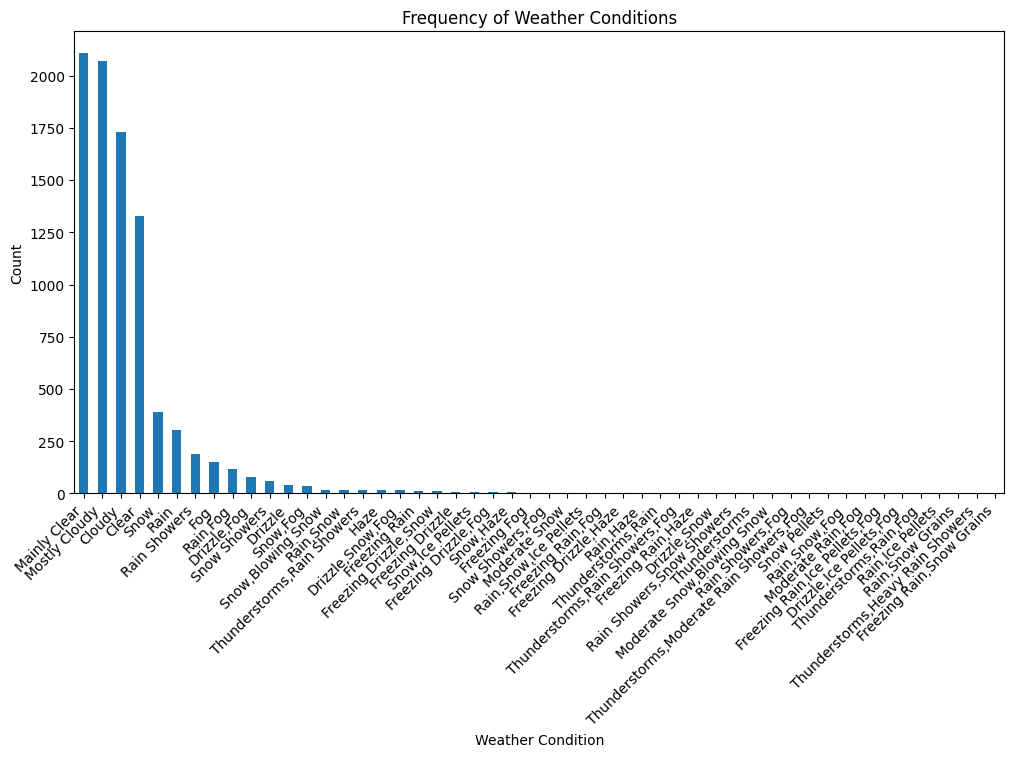

In [74]:
weather_counts = weather_data['Weather'].value_counts()
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization:

### Histograms

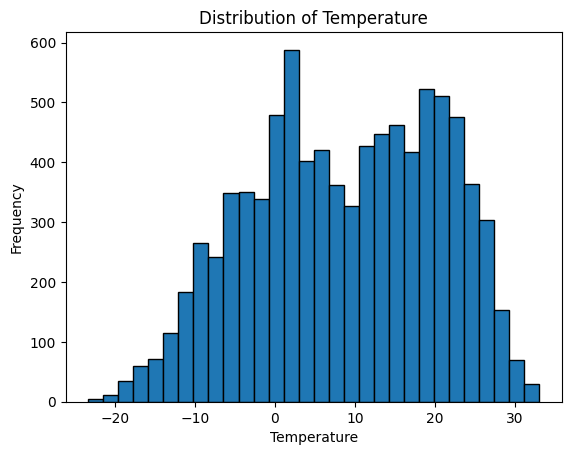

In [21]:
# Plot a histogram of the 'Temperature' column
plt.hist(weather_data['Temp_C'], bins=30, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


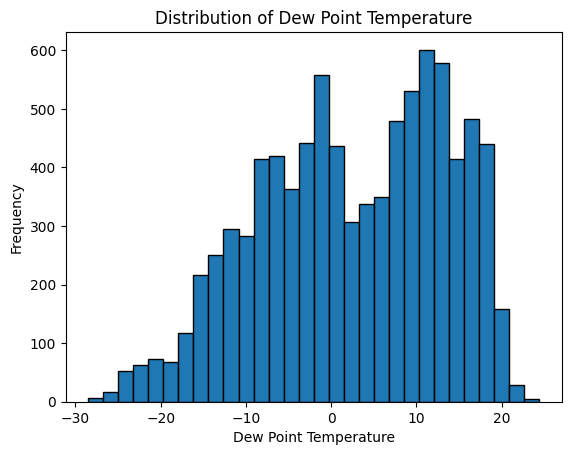

In [22]:
# Plot a histogram of the 'Dew Point Temperature' column
plt.hist(weather_data['Dew Point Temp_C'], bins=30, edgecolor='black')
plt.title('Distribution of Dew Point Temperature')
plt.xlabel('Dew Point Temperature')
plt.ylabel('Frequency')
plt.show()

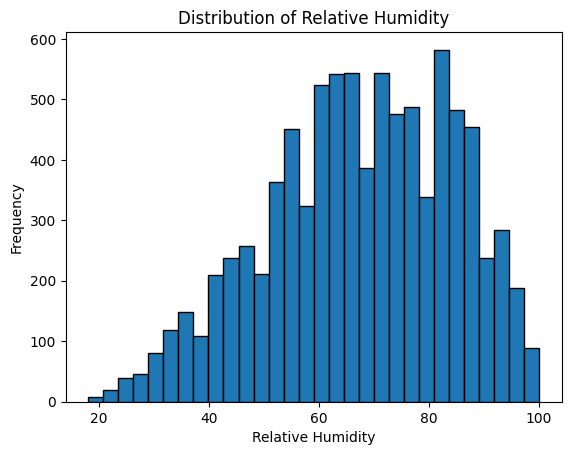

In [23]:
# Plot a histogram of the 'Relative Humidity' column
plt.hist(weather_data['Rel Hum_%'], bins=30, edgecolor='black')
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.show()

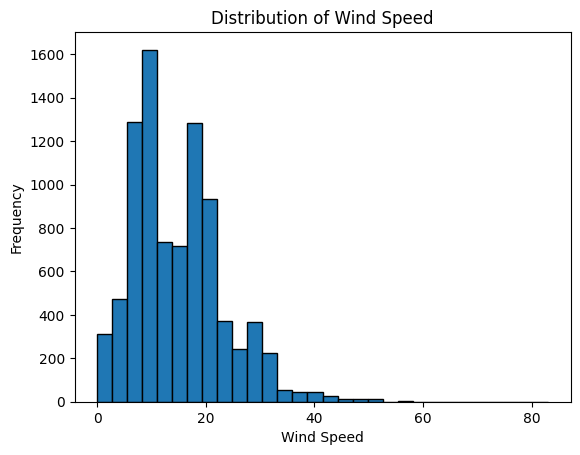

In [24]:
# Plot a histogram of the 'Wind Speed' column
plt.hist(weather_data['Wind Speed_km/h'], bins=30, edgecolor='black')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

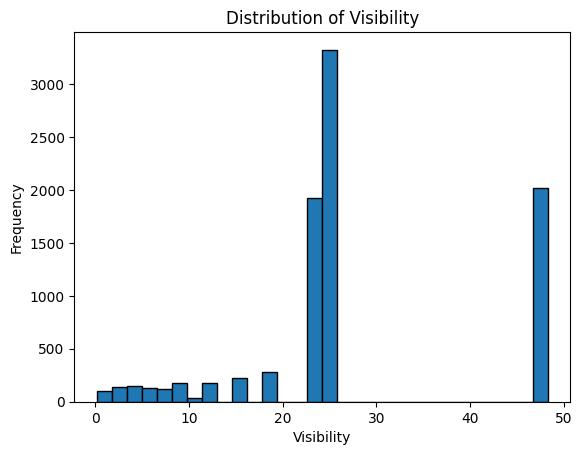

In [25]:
# Plot a histogram of the 'Visibility' column
plt.hist(weather_data['Visibility_km'], bins=30, edgecolor='black')
plt.title('Distribution of Visibility')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.show()

## Box Plots

Are good for visualising outliers

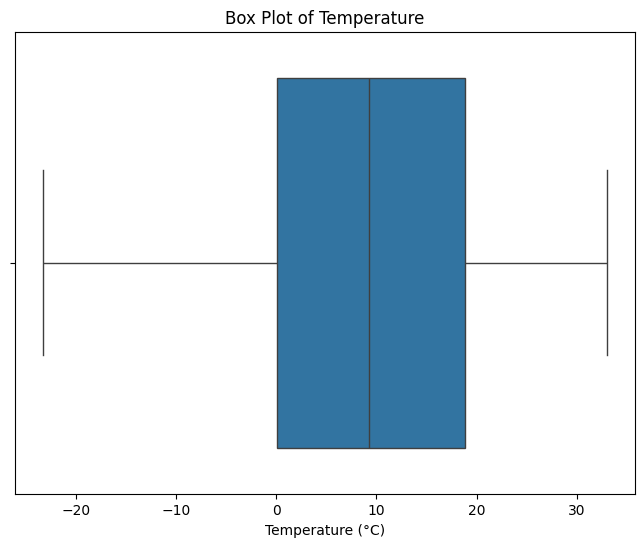

In [30]:
# Plot a box plot for the 'Temp_C' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Temp_C'])
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()


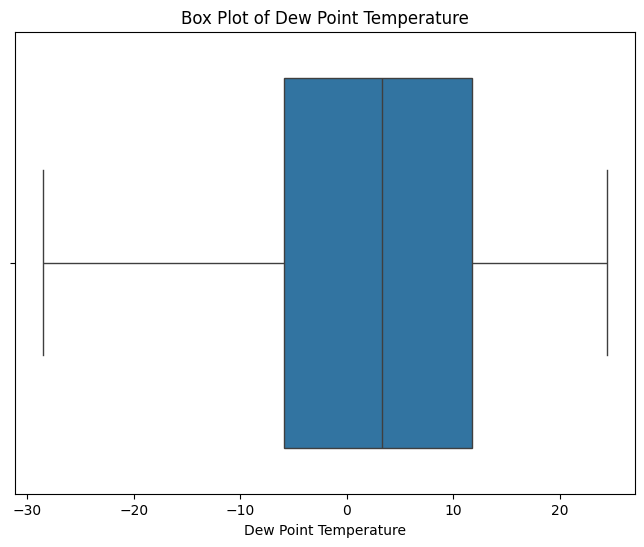

In [38]:
# Plot a box plot for the 'Dew Point Temperature' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Dew Point Temp_C'])
plt.title('Box Plot of Dew Point Temperature')
plt.xlabel('Dew Point Temperature')
plt.show()

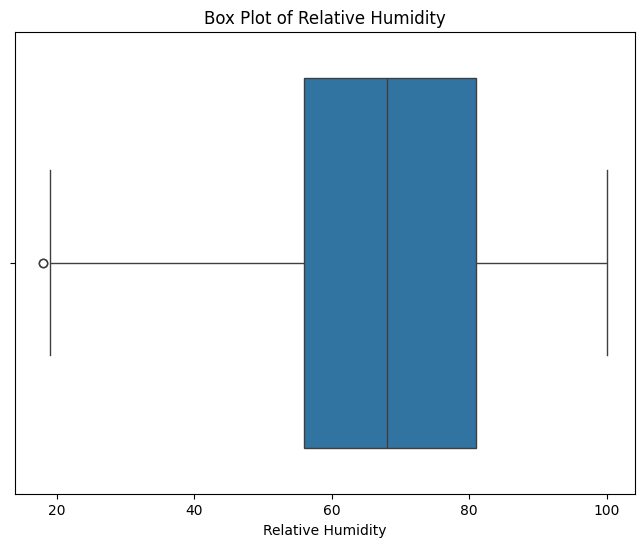

In [39]:
# Plot a box plot for the 'Relative Humidity' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Rel Hum_%'])
plt.title('Box Plot of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.show()

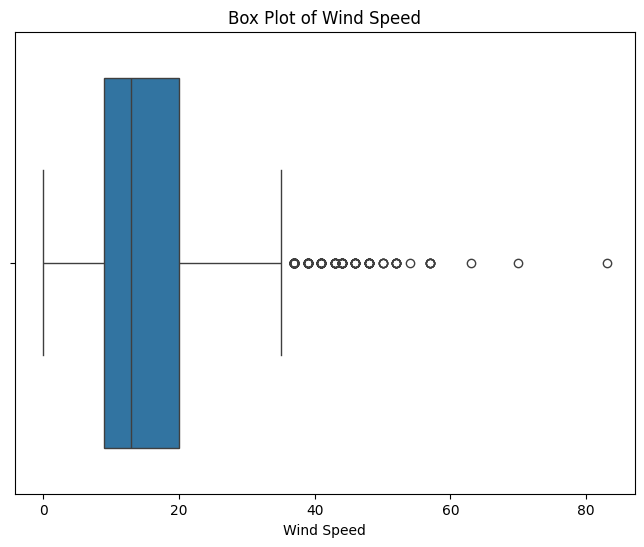

In [40]:
# Plot a box plot for the 'Wind Speed' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Wind Speed_km/h'])
plt.title('Box Plot of Wind Speed')
plt.xlabel('Wind Speed')
plt.show()

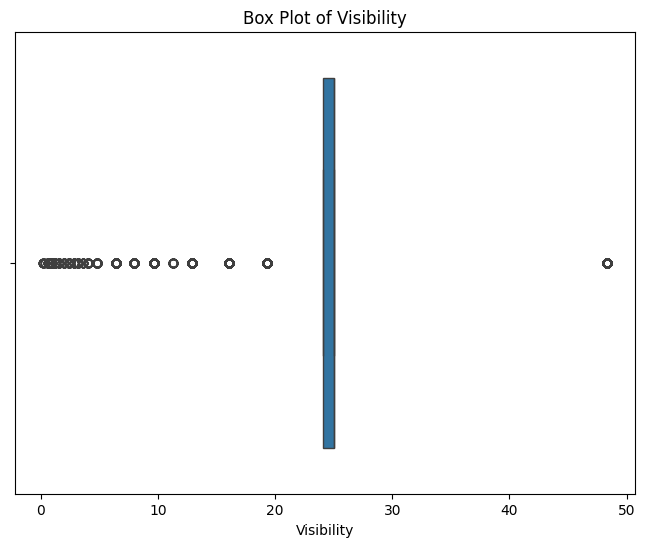

In [42]:
# Plot a box plot for the 'Visibility' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Visibility_km'])
plt.title('Box Plot of Visibility')
plt.xlabel('Visibility')
plt.show()

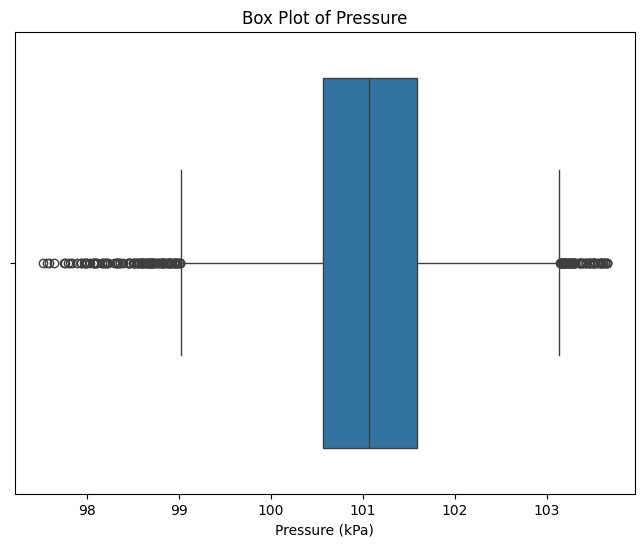

In [36]:
# Plot a box plot for the 'Press_kPa' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['Press_kPa'])
plt.title('Box Plot of Pressure')
plt.xlabel('Pressure (kPa)')
plt.show()


*Conclusion: Most of the features have outliers*

## Correlation Matrix

In [27]:
# Compute correlation matrix
correlation_matrix = weather_data.corr()

# Display the correlation matrix
correlation_matrix


ValueError: could not convert string to float: '1/1/2012 0:00'

In [28]:
# Extract numerical features for correlation
numerical_data = weather_data.select_dtypes(include=['number'])

# Compute correlation matrix on numerical data
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
correlation_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


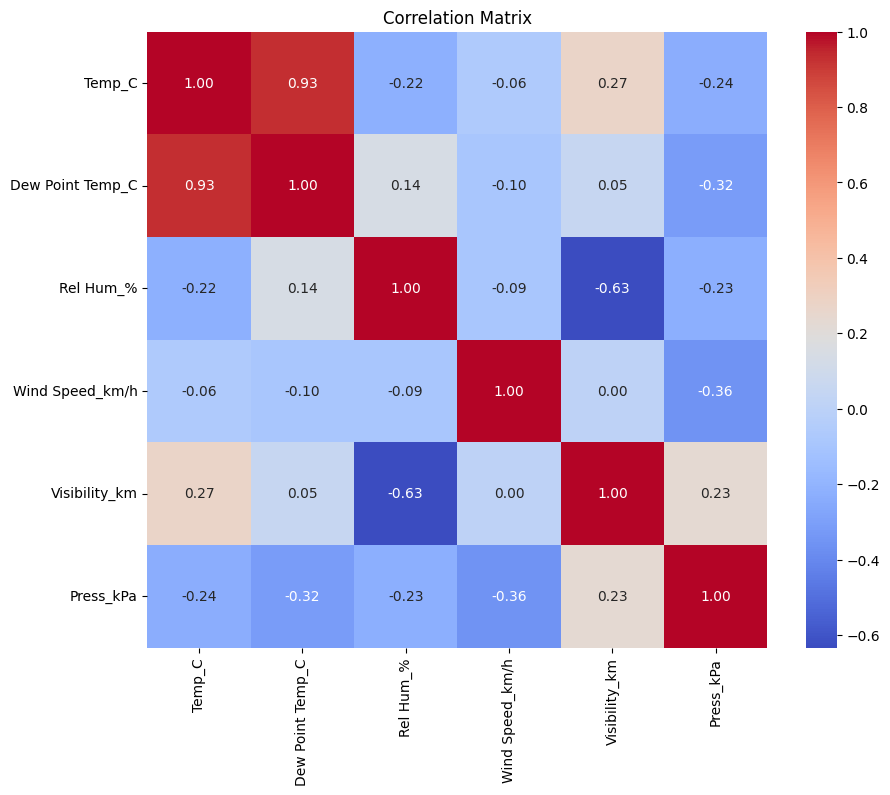

In [29]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Conclusion: Temperature and Dew point Temperature are highly correlated

# Time Series Analysis

## Time Series Trends Visualization

This code block generates time series plots for each numerical weather parameter (temperature, dew point temperature, etc.) to visualize trends over time.

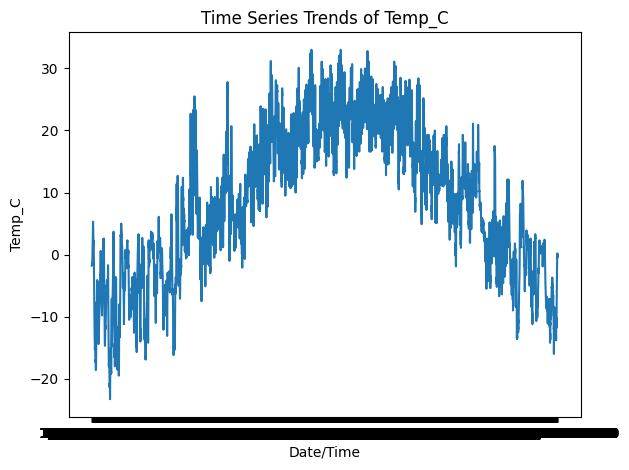

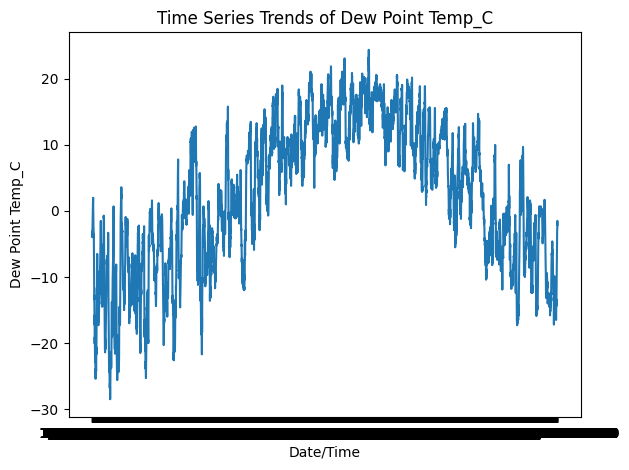

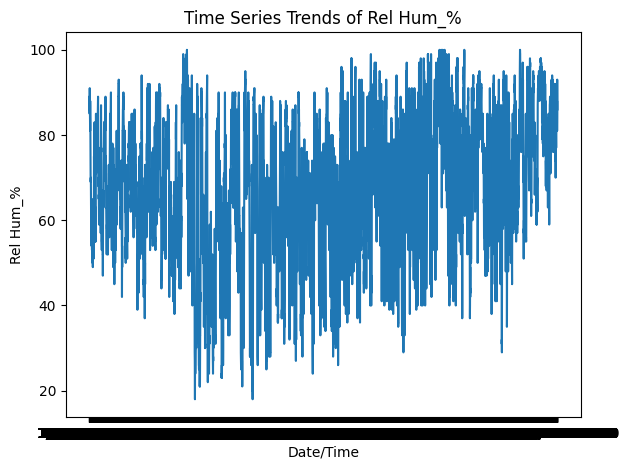

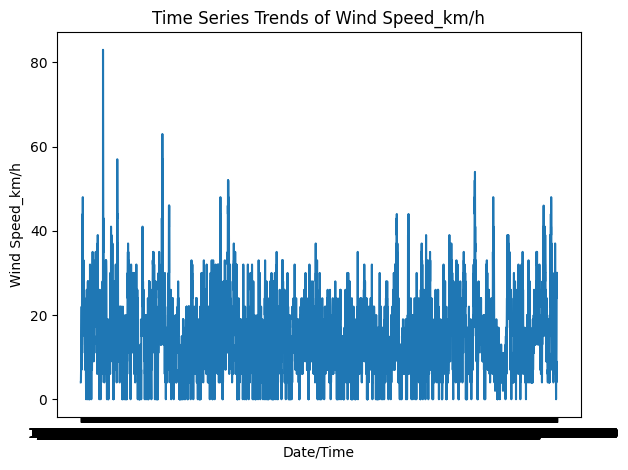

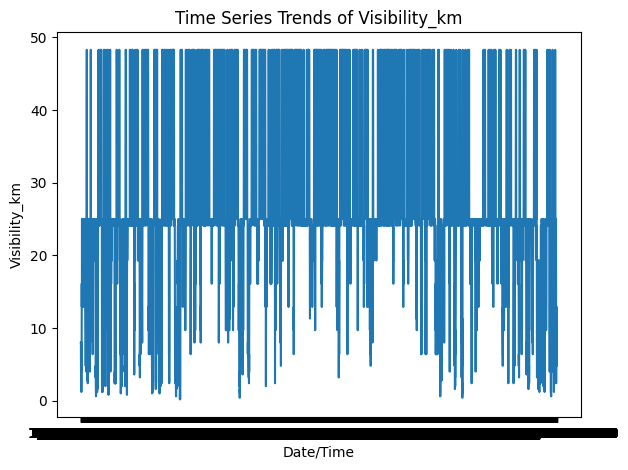

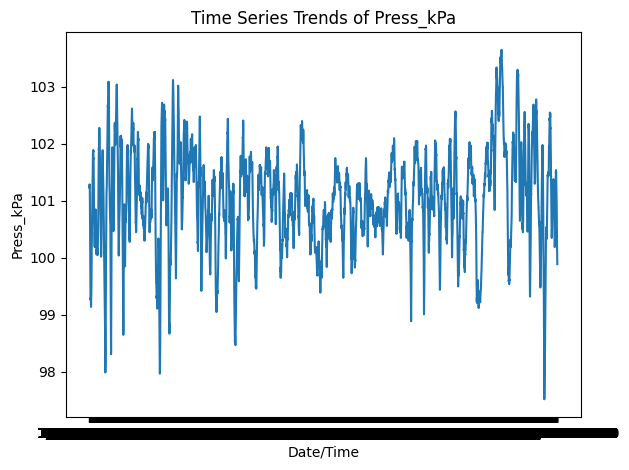

In [43]:
for col in numerical_data:
  plt.figure()
  plt.plot(weather_data['Date/Time'], weather_data[col])
  plt.title(f"Time Series Trends of {col}")
  plt.xlabel('Date/Time')
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()

## Weather Patterns and Trends

Splitting the Date/Time into  manageable format

In [44]:
# Convert 'Date/Time' to datetime format
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])

Since year is consistent, let's split it into month and day

In [46]:
weather_data['Month'] = weather_data['Date/Time'].dt.month


In [47]:
weather_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,12
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,12
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12


### Calculate Monthly Averages of each column

In [49]:
monthly_averages = weather_data.groupby('Month').mean(numeric_only=True)
print(monthly_averages)


          Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
Month                                                                           
1      -7.371505        -12.294758  68.383065        18.108871      22.100269   
2      -4.225000         -9.221695  68.956897        14.837644      25.182184   
3       3.121237         -3.488575  64.862903        14.514785      26.177957   
4       7.009306         -1.934583  56.150000        17.369444      31.777083   
5      16.237769          8.080780  61.760753        12.846774      29.418548   
6      20.134028         11.738056  60.643056        14.681944      32.104167   
7      22.790054         14.595430  62.017473        11.887097      33.655108   
8      22.279301         15.644758  67.943548        13.931452      30.192608   
9      16.484444         10.757917  71.165278        14.108333      30.603472   
10     10.954973          6.533468  75.731183        15.475806      25.111022   
11      0.931389         -4.

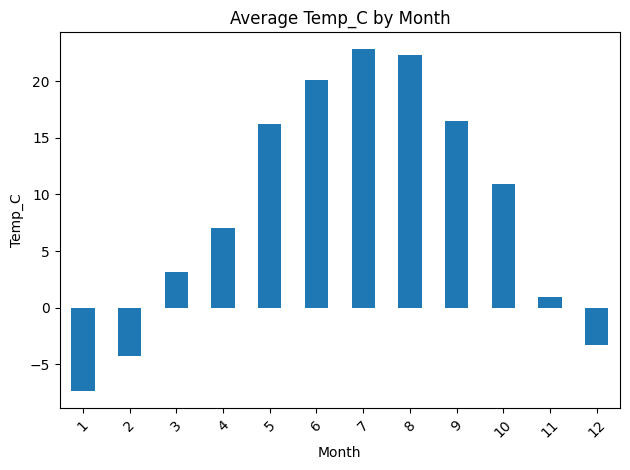

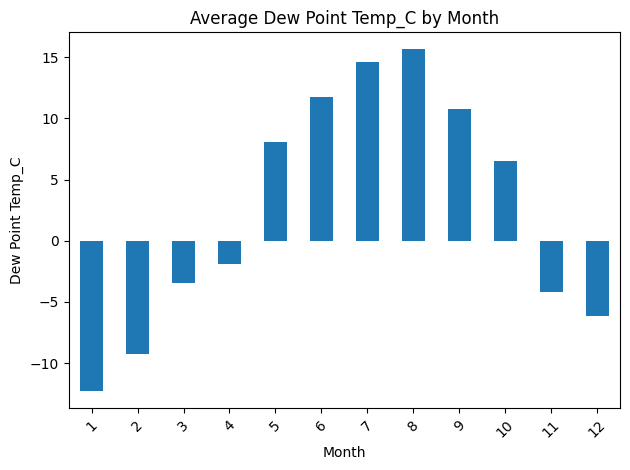

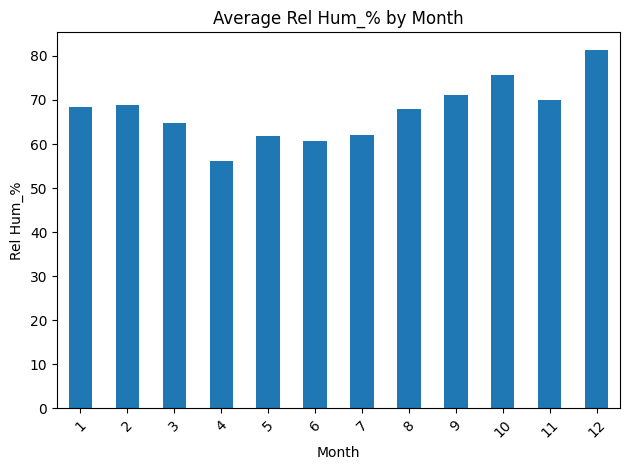

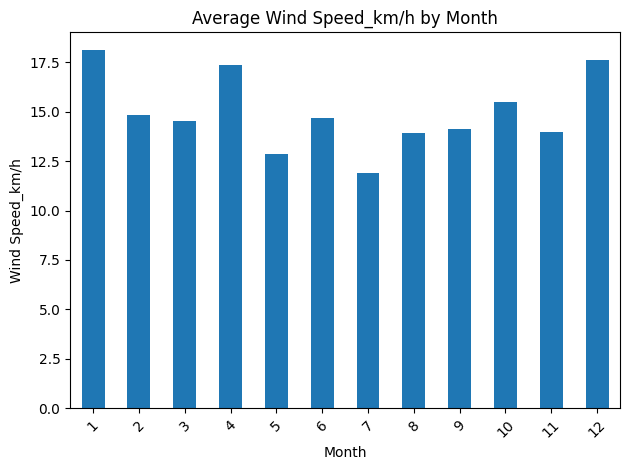

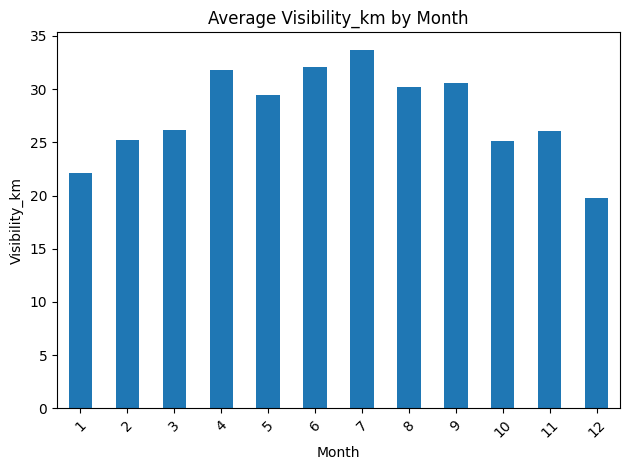

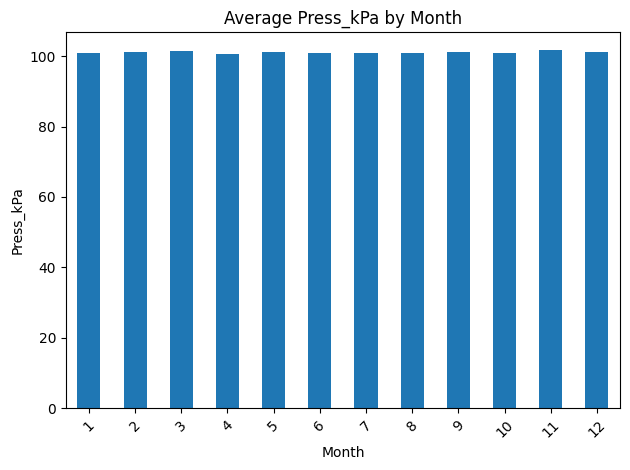

In [73]:
# Plot bar graphs for each column
for column in monthly_averages.columns:
  plt.figure()
  monthly_averages[column].plot(kind='bar')
  plt.xlabel('Month')
  plt.ylabel(column)
  plt.title(f'Average {column} by Month')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

### Weather Standard deviation

In [50]:
monthly_std = weather_data.groupby('Month').std(numeric_only=True)
print(monthly_std)


         Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
Month                                                                          
1      6.382532          7.314661  11.151944        10.357420      11.634944   
2      5.132305          6.019910  12.208306         8.650417      12.089908   
3      7.808771          8.293714  19.478739         9.282456      14.213380   
4      5.031103          5.681212  19.009616         9.598456      11.901921   
5      5.216031          5.340641  19.030379         7.117409      13.546466   
6      5.011927          4.094923  15.129909         6.940655      12.061542   
7      4.026849          3.732698  15.865721         6.233081      12.252497   
8      3.708003          3.264215  15.362100         7.535783      11.430615   
9      5.285297          4.403377  16.655360         8.152540      12.134068   
10     4.217400          5.016548  15.495853         9.242476      10.929073   
11     4.921951          5.016951  13.56

### Weather Variance

In [51]:
monthly_var = weather_data.groupby('Month').var(numeric_only=True)
print(monthly_var)


          Temp_C  Dew Point Temp_C   Rel Hum_%  Wind Speed_km/h  \
Month                                                             
1      40.736711         53.504266  124.365850       107.276153   
2      26.340554         36.239313  149.042744        74.829718   
3      60.976910         68.785697  379.421287        86.163980   
4      25.312000         32.276174  361.365508        92.130359   
5      27.206983         28.522443  362.155335        50.657513   
6      25.119411         16.768397  228.914138        48.172692   
7      16.215513         13.933034  251.721094        38.851300   
8      13.749288         10.655100  235.994117        56.788027   
9      27.934361         19.389729  277.401018        66.463908   
10     17.786462         25.165756  240.121449        85.423371   
11     24.225606         25.169794  183.984467        73.321973   
12     31.619112         38.664647  111.967914        86.417616   

       Visibility_km  Press_kPa  
Month                      

### Weather Range

In [52]:
monthly_range = weather_data.groupby('Month').apply(lambda x: x.max(numeric_only=True) - x.min(numeric_only=True))
print(monthly_range)


       Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
Month                                                                        
1        28.6              32.1       51.0             83.0           47.7   
2        23.0              26.9       57.0             41.0           47.5   
3        41.7              35.4       82.0             63.0           48.1   
4        30.8              29.4       73.0             52.0           40.3   
5        26.6              24.9       77.0             35.0           47.9   
6        23.5              20.1       66.0             37.0           43.5   
7        20.6              18.4       72.0             35.0           45.1   
8        22.3              17.7       64.0             44.0           43.5   
9        23.5              19.3       71.0             44.0           41.9   
10       23.0              21.1       63.0             54.0           47.9   
11       31.1              27.3       66.0             48.0     

### Weather Monthly Frequency

In [53]:
# Monthly weather frequency
monthly_weather_counts = weather_data.groupby(['Month', 'Weather']).size().unstack(fill_value=0)
print(monthly_weather_counts)

Weather  Clear  Cloudy  Drizzle  Drizzle,Fog  Drizzle,Ice Pellets,Fog  \
Month                                                                   
1           77     145        1            6                        0   
2          146     157        1            0                        0   
3          155     159        2           14                        0   
4           93     177        0            1                        0   
5          109     136        2           24                        0   
6           95     128        4            2                        0   
7          129     111        0            1                        0   
8          112      97        1            0                        0   
9          130     122        7           10                        0   
10          83     153        3           10                        0   
11         141     131       12            0                        0   
12          56     212        8           12       

### SEASONS

In [54]:
def assign_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Autumn'

weather_data['Season'] = weather_data['Month'].apply(assign_season)


In [55]:
weather_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,Season
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,Winter
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,Winter
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,Winter
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,Winter
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,Winter
...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,12,Winter
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,12,Winter
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12,Winter
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12,Winter


In [56]:
seasonal_weather = weather_data.groupby('Season')['Weather'].value_counts().unstack(fill_value=0)
print(seasonal_weather)

Weather  Clear  Cloudy  Drizzle  Drizzle,Fog  Drizzle,Ice Pellets,Fog  \
Season                                                                  
Autumn     354     406       22           20                        0   
Spring     357     472        4           39                        0   
Summer     336     336        5            3                        0   
Winter     279     514       10           18                        1   

Weather  Drizzle,Snow  Drizzle,Snow,Fog  Fog  Freezing Drizzle  \
Season                                                           
Autumn              0                 0   46                 0   
Spring              0                 0   55                 0   
Summer              0                 0    5                 0   
Winter              2                15   44                 7   

Weather  Freezing Drizzle,Fog  ...  Snow,Fog  Snow,Haze  Snow,Ice Pellets  \
Season                         ...                                          
Autumn    

#### Winter

In [57]:
# Select a specific season
selected_season = 'Winter'

# Calculate percentages for the selected season
season_data = seasonal_weather.loc[selected_season]
season_percentages = season_data / season_data.sum() * 100

print(f"\nPercentage of weather conditions in {selected_season}:\n")
print(season_percentages)



Percentage of weather conditions in Winter:

Weather
Clear                                      12.774725
Cloudy                                     23.534799
Drizzle                                     0.457875
Drizzle,Fog                                 0.824176
Drizzle,Ice Pellets,Fog                     0.045788
Drizzle,Snow                                0.091575
Drizzle,Snow,Fog                            0.686813
Fog                                         2.014652
Freezing Drizzle                            0.320513
Freezing Drizzle,Fog                        0.274725
Freezing Drizzle,Haze                       0.137363
Freezing Drizzle,Snow                       0.457875
Freezing Fog                                0.091575
Freezing Rain                               0.641026
Freezing Rain,Fog                           0.183150
Freezing Rain,Haze                          0.091575
Freezing Rain,Ice Pellets,Fog               0.045788
Freezing Rain,Snow Grains                   0

In [58]:
# Get the most occurring weather condition in the selected season
most_occurring_weather = season_percentages.idxmax()
print(f"\nMost occurring weather condition in {selected_season}: {most_occurring_weather}")



Most occurring weather condition in Winter: Cloudy


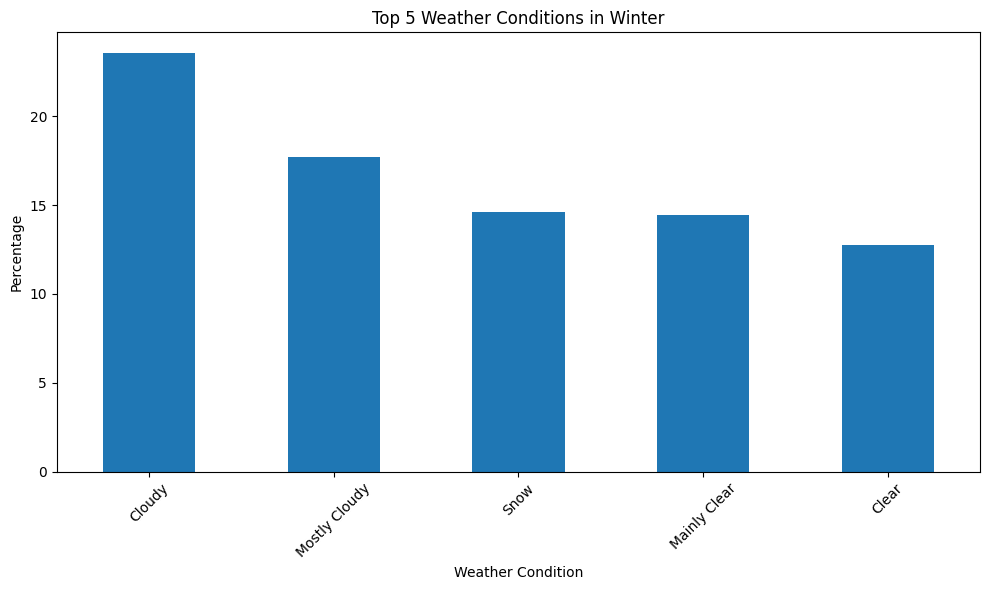

In [59]:
# Sort and get the top 5 weather conditions
top_5_weather = season_percentages.sort_values(ascending=False).head()

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar')
plt.title(f"Top 5 Weather Conditions in {selected_season}")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Autumn

In [60]:
# Select a specific season
selected_season = 'Autumn'

# Calculate percentages for the selected season
season_data = seasonal_weather.loc[selected_season]
season_percentages = season_data / season_data.sum() * 100

print(f"\nPercentage of weather conditions in {selected_season}:\n")
print(season_percentages)


Percentage of weather conditions in Autumn:

Weather
Clear                                      16.208791
Cloudy                                     18.589744
Drizzle                                     1.007326
Drizzle,Fog                                 0.915751
Drizzle,Ice Pellets,Fog                     0.000000
Drizzle,Snow                                0.000000
Drizzle,Snow,Fog                            0.000000
Fog                                         2.106227
Freezing Drizzle                            0.000000
Freezing Drizzle,Fog                        0.000000
Freezing Drizzle,Haze                       0.000000
Freezing Drizzle,Snow                       0.000000
Freezing Fog                                0.000000
Freezing Rain                               0.000000
Freezing Rain,Fog                           0.000000
Freezing Rain,Haze                          0.000000
Freezing Rain,Ice Pellets,Fog               0.000000
Freezing Rain,Snow Grains                   0

In [61]:
# Get the most occurring weather condition in the selected season
most_occurring_weather = season_percentages.idxmax()
print(f"\nMost occurring weather condition in {selected_season}: {most_occurring_weather}")



Most occurring weather condition in Autumn: Mostly Cloudy


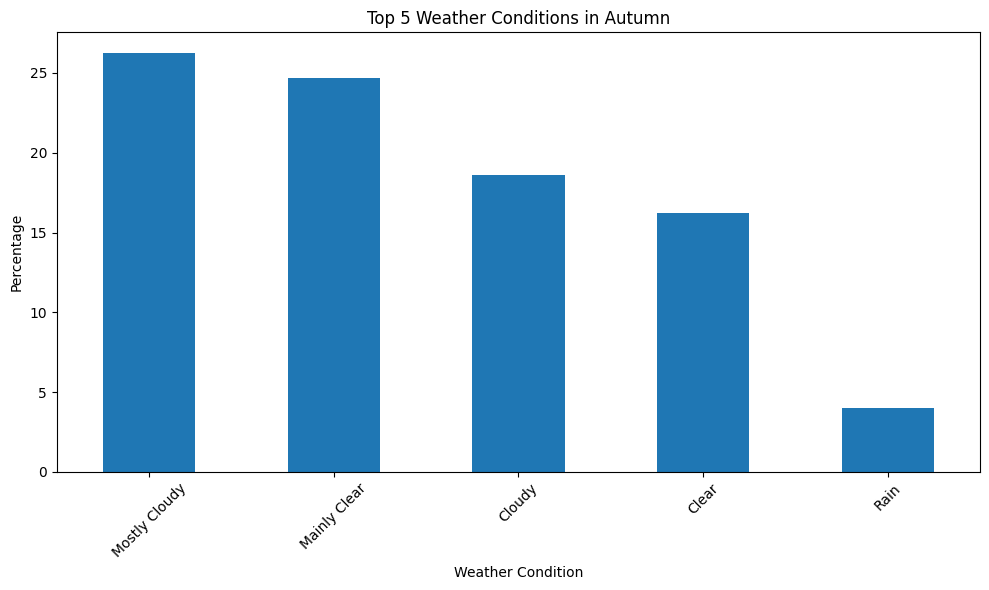

In [62]:
# Sort and get the top 5 weather conditions
top_5_weather = season_percentages.sort_values(ascending=False).head()

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar')
plt.title(f"Top 5 Weather Conditions in {selected_season}")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Spring

In [63]:
# Select a specific season
selected_season = 'Spring'

# Calculate percentages for the selected season
season_data = seasonal_weather.loc[selected_season]
season_percentages = season_data / season_data.sum() * 100

print(f"\nPercentage of weather conditions in {selected_season}:\n")
print(season_percentages)


Percentage of weather conditions in Spring:

Weather
Clear                                      16.168478
Cloudy                                     21.376812
Drizzle                                     0.181159
Drizzle,Fog                                 1.766304
Drizzle,Ice Pellets,Fog                     0.000000
Drizzle,Snow                                0.000000
Drizzle,Snow,Fog                            0.000000
Fog                                         2.490942
Freezing Drizzle                            0.000000
Freezing Drizzle,Fog                        0.000000
Freezing Drizzle,Haze                       0.000000
Freezing Drizzle,Snow                       0.045290
Freezing Fog                                0.090580
Freezing Rain                               0.000000
Freezing Rain,Fog                           0.000000
Freezing Rain,Haze                          0.000000
Freezing Rain,Ice Pellets,Fog               0.000000
Freezing Rain,Snow Grains                   0

In [64]:
# Get the most occurring weather condition in the selected season
most_occurring_weather = season_percentages.idxmax()
print(f"\nMost occurring weather condition in {selected_season}: {most_occurring_weather}")



Most occurring weather condition in Spring: Mostly Cloudy


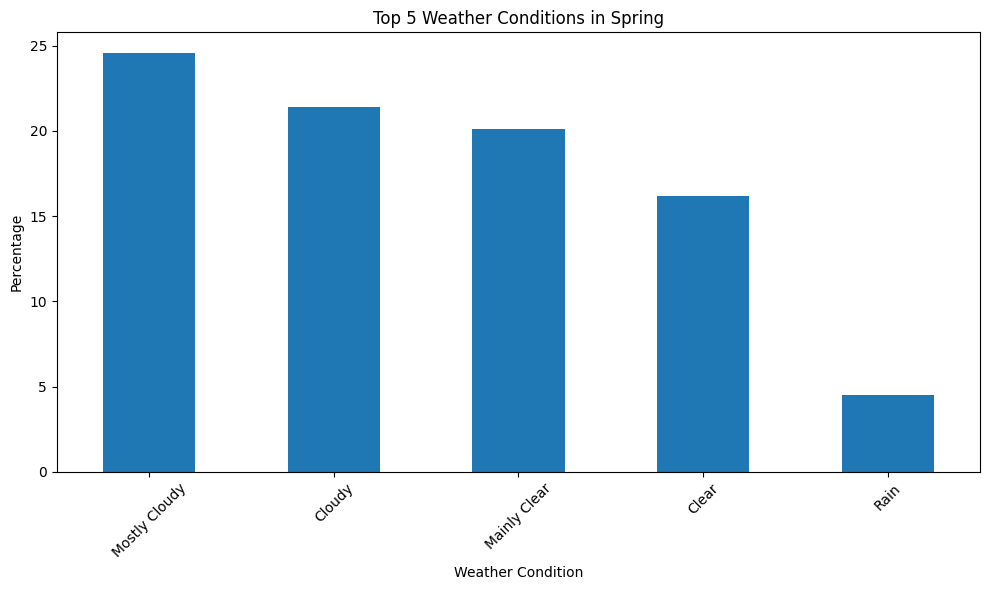

In [65]:
# Sort and get the top 5 weather conditions
top_5_weather = season_percentages.sort_values(ascending=False).head()

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar')
plt.title(f"Top 5 Weather Conditions in {selected_season}")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Summer**

In [ ]:
# Select a specific season
selected_season = 'Summer'

# Calculate percentages for the selected season
season_data = seasonal_weather.loc[selected_season]
season_percentages = season_data / season_data.sum() * 100

print(f"\nPercentage of weather conditions in {selected_season}:\n")
print(season_percentages)


Percentage of weather conditions in Summer:

Weather
Clear                                      15.217391
Cloudy                                     15.217391
Drizzle                                     0.226449
Drizzle,Fog                                 0.135870
Drizzle,Ice Pellets,Fog                     0.000000
Drizzle,Snow                                0.000000
Drizzle,Snow,Fog                            0.000000
Fog                                         0.226449
Freezing Drizzle                            0.000000
Freezing Drizzle,Fog                        0.000000
Freezing Drizzle,Haze                       0.000000
Freezing Drizzle,Snow                       0.000000
Freezing Fog                                0.000000
Freezing Rain                               0.000000
Freezing Rain,Fog                           0.000000
Freezing Rain,Haze                          0.000000
Freezing Rain,Ice Pellets,Fog               0.000000
Freezing Rain,Snow Grains                   0

In [66]:
# Get the most occurring weather condition in the selected season
most_occurring_weather = season_percentages.idxmax()
print(f"\nMost occurring weather condition in {selected_season}: {most_occurring_weather}")



Most occurring weather condition in Spring: Mostly Cloudy


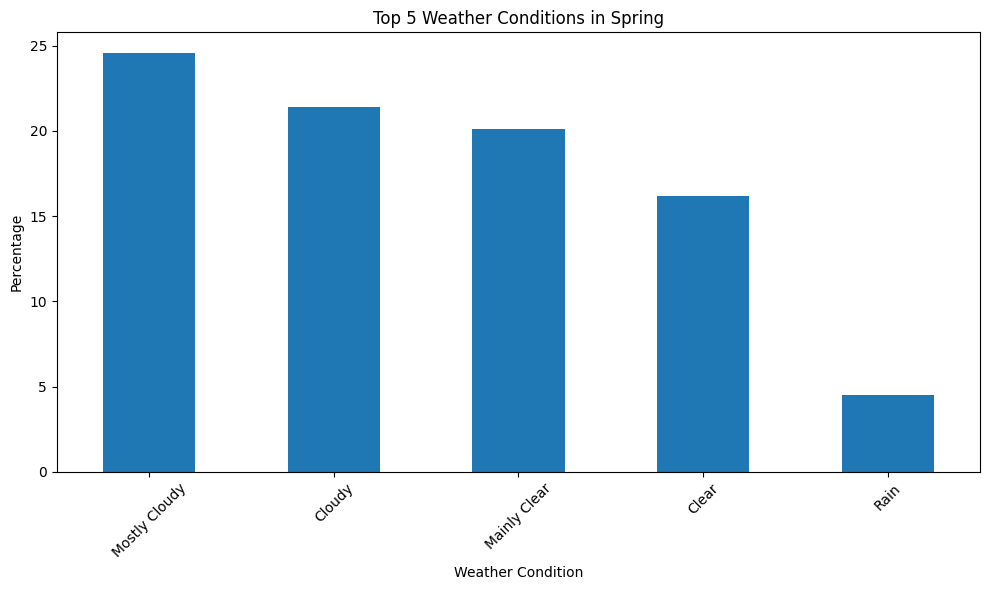

In [67]:
# Sort and get the top 5 weather conditions
top_5_weather = season_percentages.sort_values(ascending=False).head()

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar')
plt.title(f"Top 5 Weather Conditions in {selected_season}")
plt.xlabel("Weather Condition")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of features over months

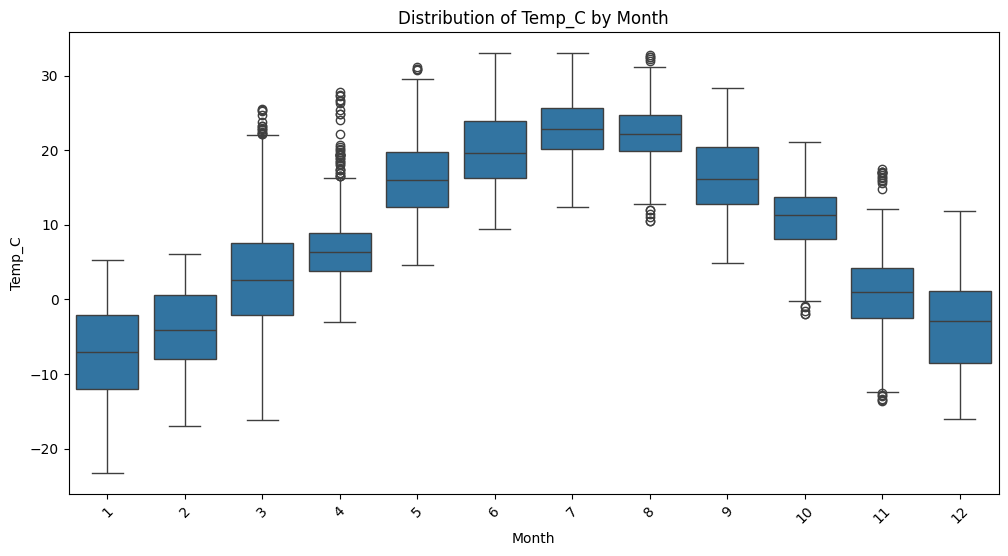

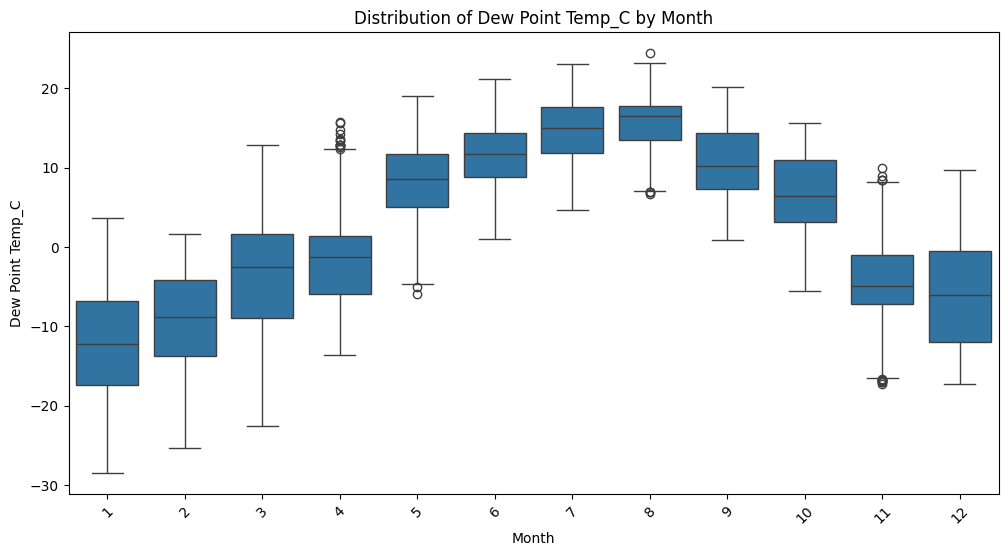

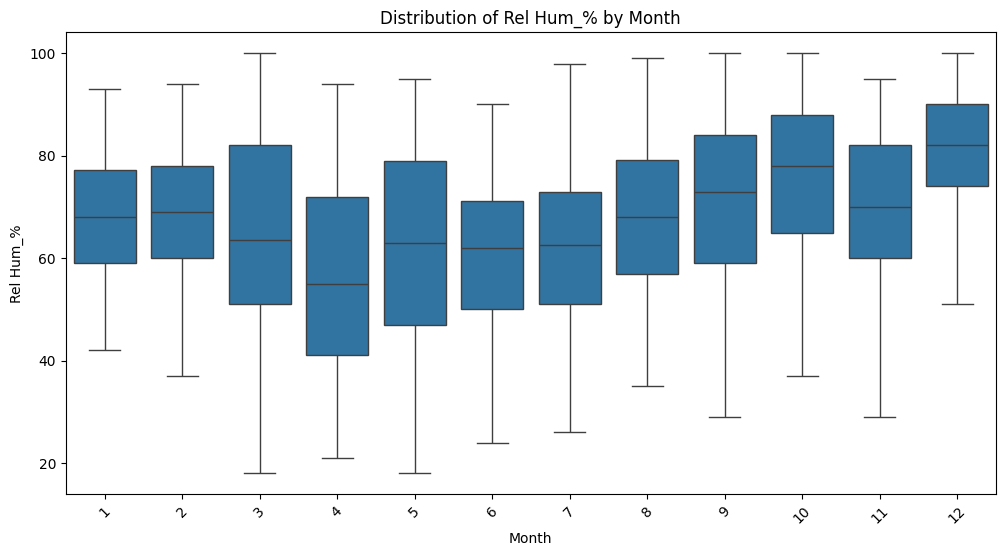

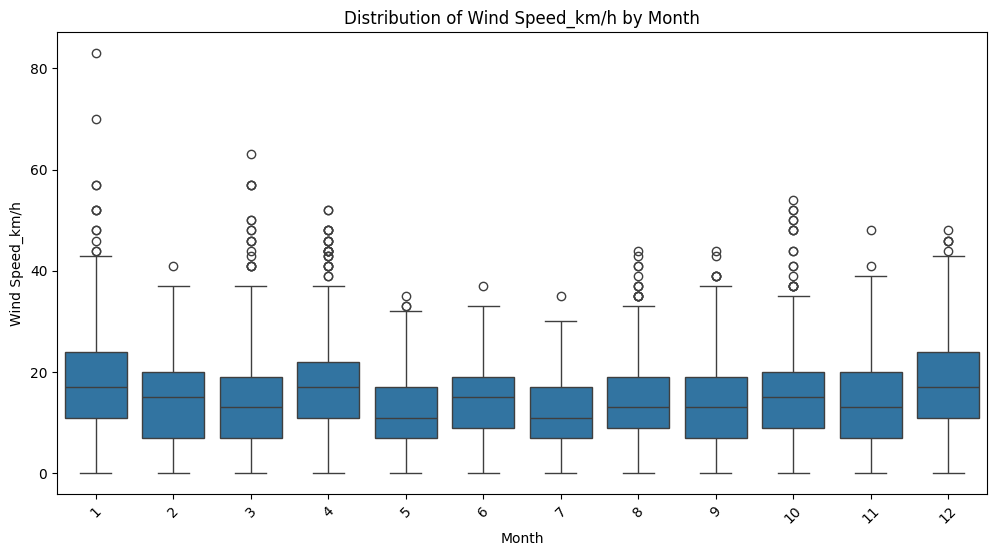

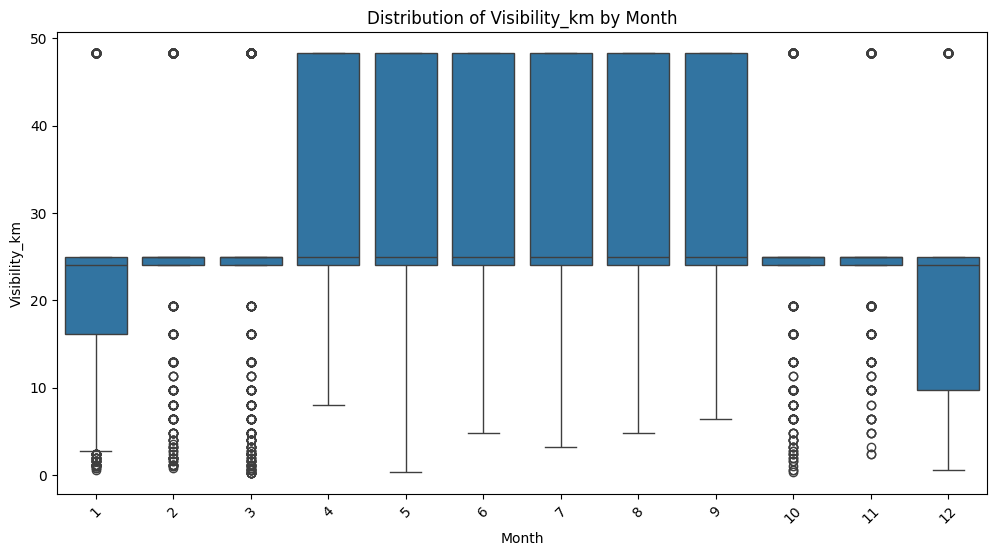

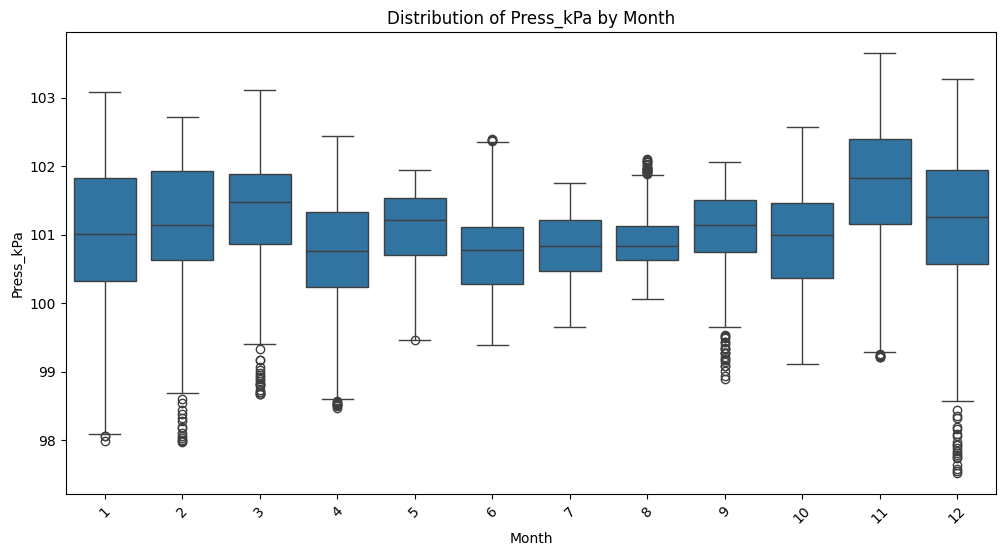

In [68]:
for col in numerical_data:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y=col, data=weather_data)
    plt.title(f'Distribution of {col} by Month')
    plt.xticks(rotation=45)
    plt.show()


### Comparing Variables


#### 1. Relationship between Temperature and Humidity

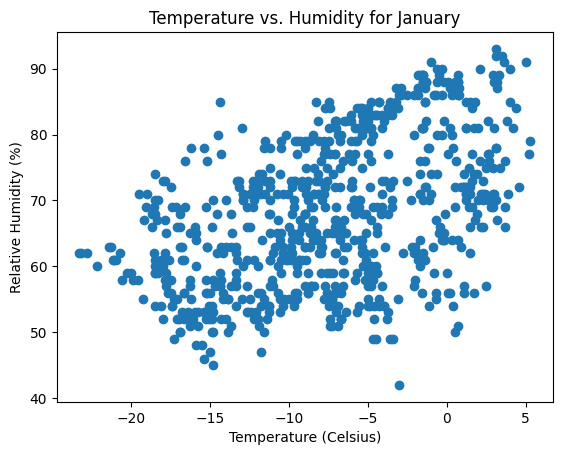

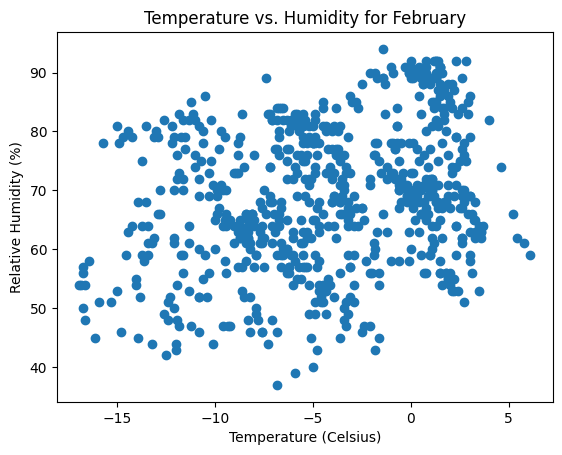

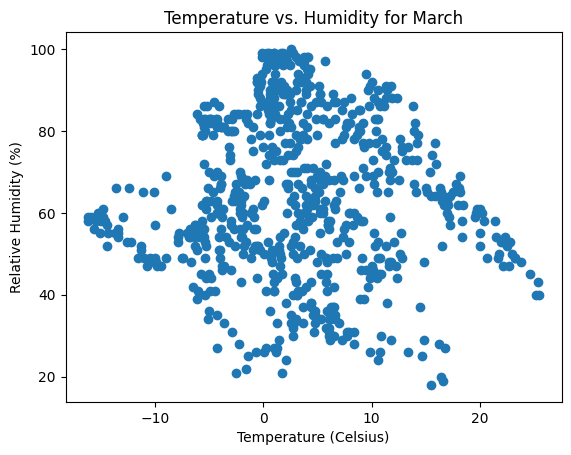

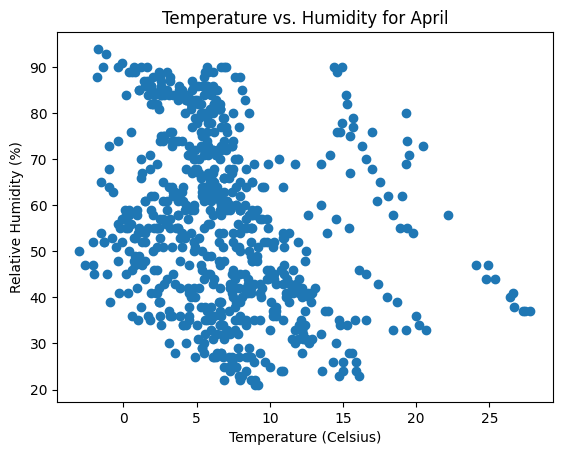

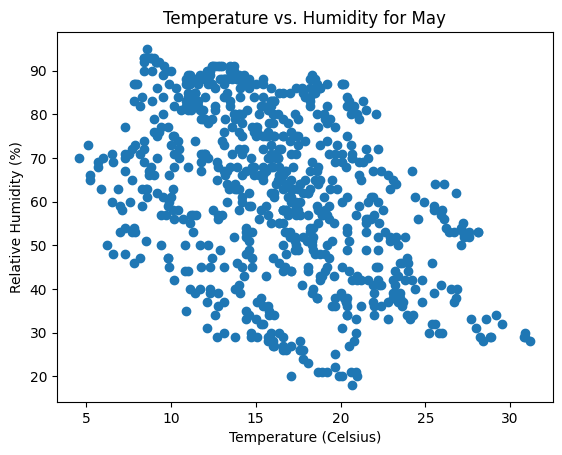

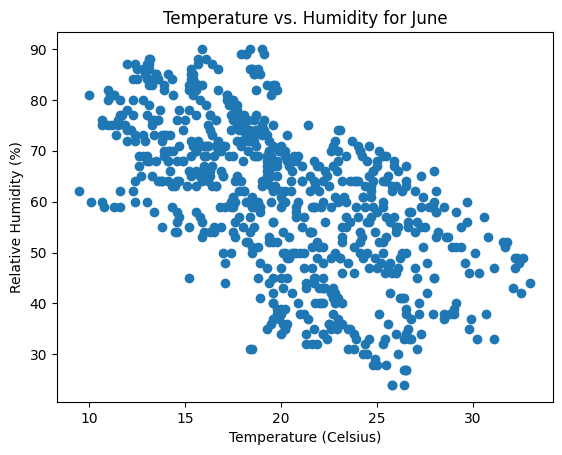

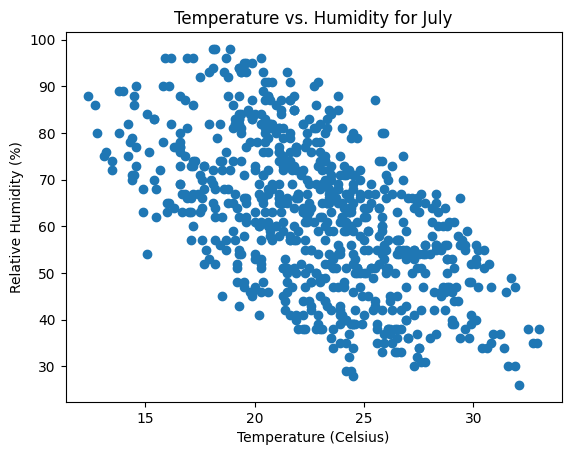

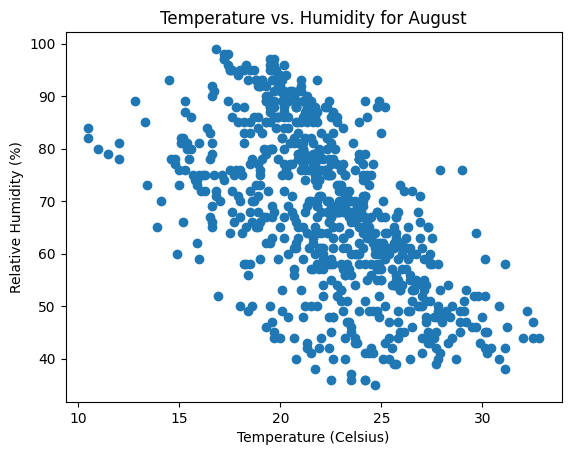

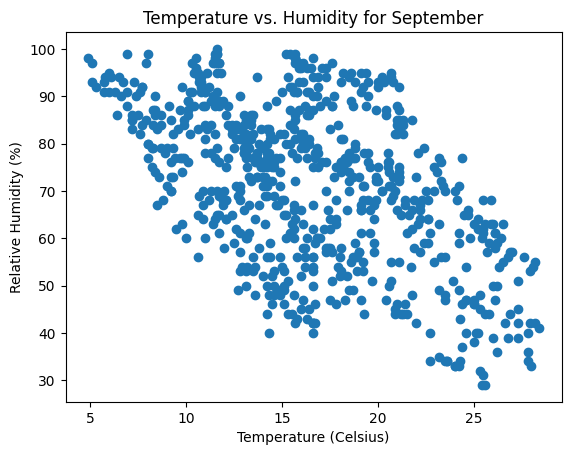

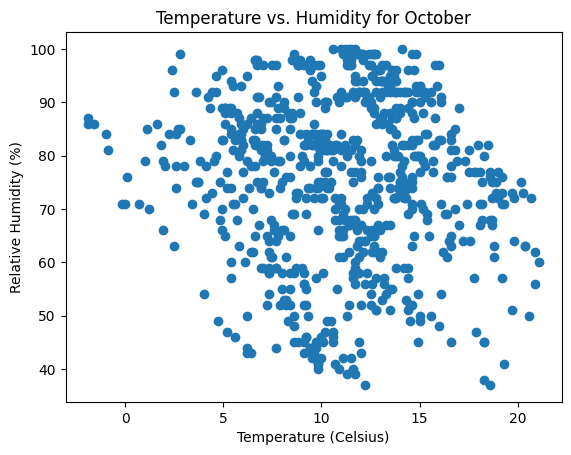

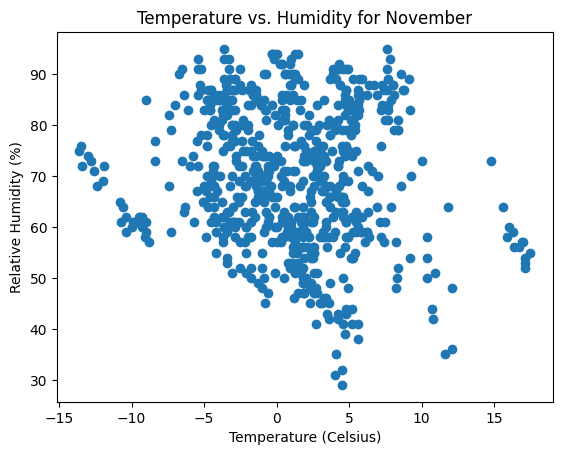

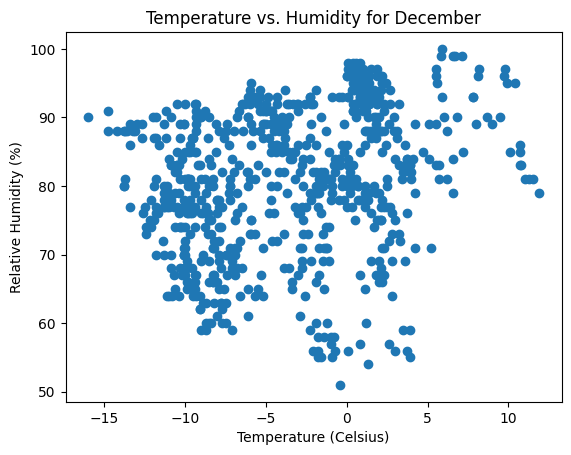

In [ ]:
import calendar

for month in range(1, 13):
  month_data = weather_data[weather_data['Month'] == month]
  plt.figure()
  plt.scatter(month_data['Temp_C'], month_data['Rel Hum_%'])
  plt.title(f"Temperature vs. Humidity for {calendar.month_name[month]}")
  plt.xlabel('Temperature (Celsius)')
  plt.ylabel('Relative Humidity (%)')
  plt.show()


The correlation between temperature and humidity is: -0.22


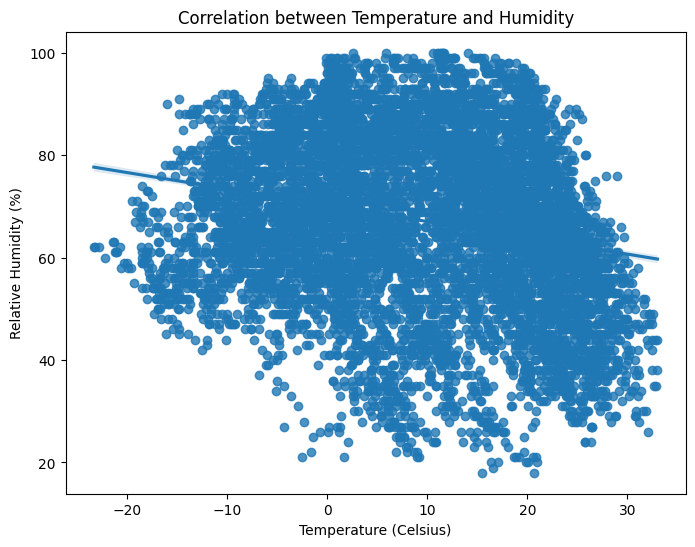

In [69]:
# Calculate the correlation coefficient
correlation = weather_data['Temp_C'].corr(weather_data['Rel Hum_%'])

print(f"The correlation between temperature and humidity is: {correlation:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Temp_C', y='Rel Hum_%', data=weather_data)
plt.title('Correlation between Temperature and Humidity')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.show()


#### 2. Relationship between Temperature and Dew Point

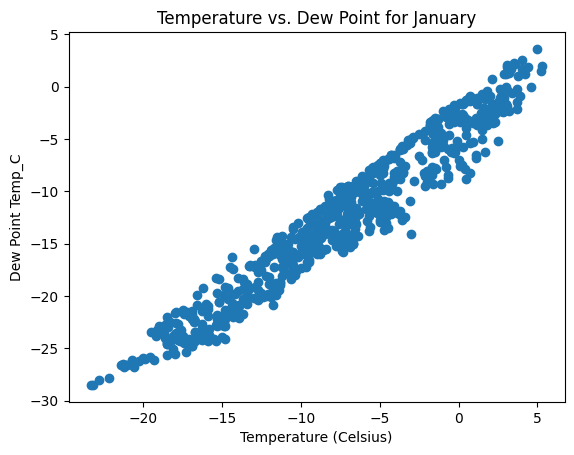

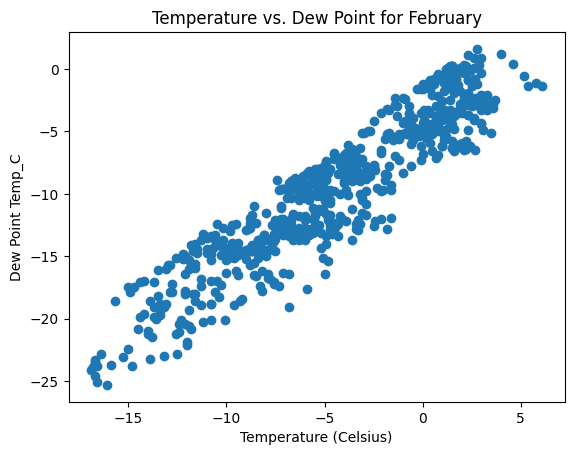

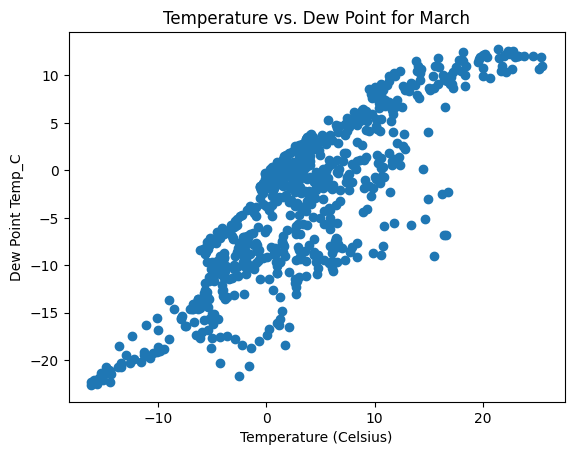

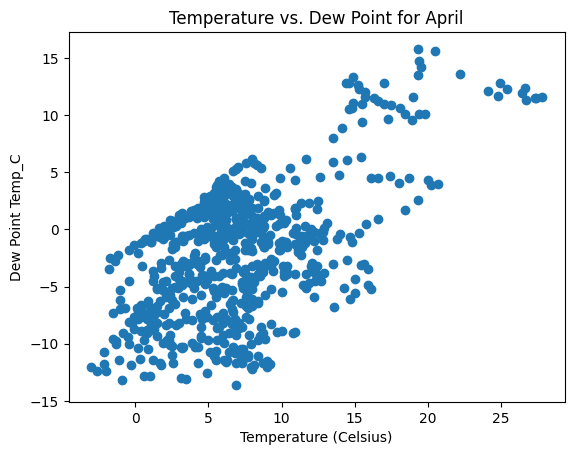

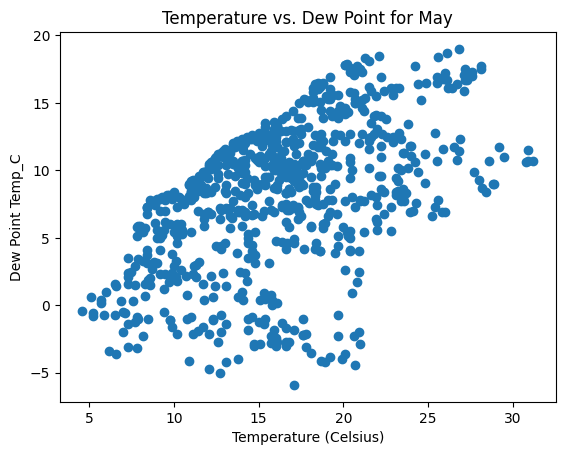

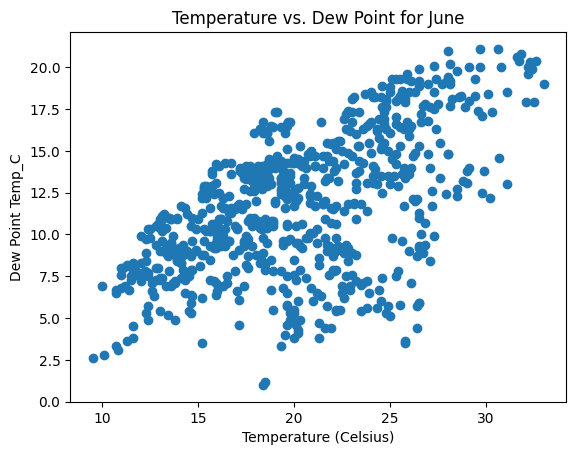

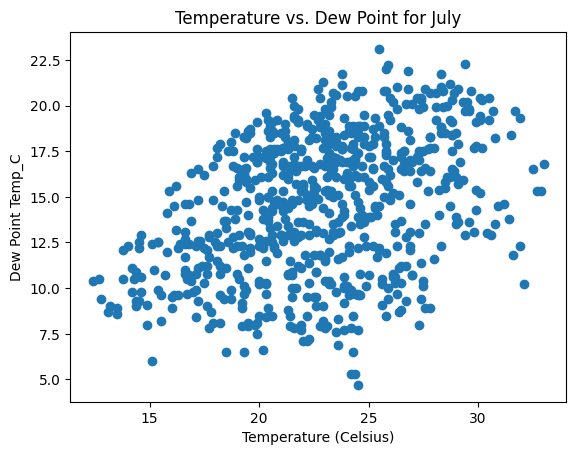

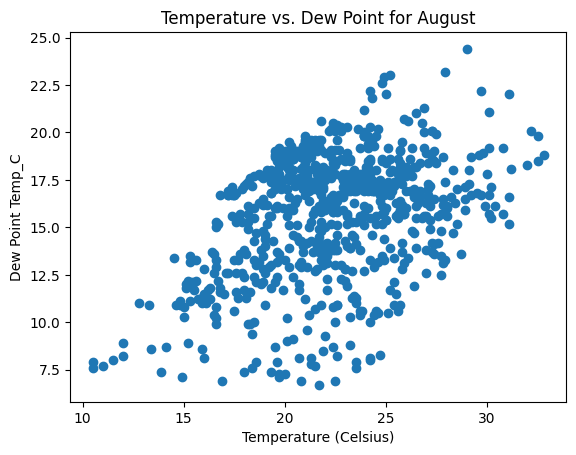

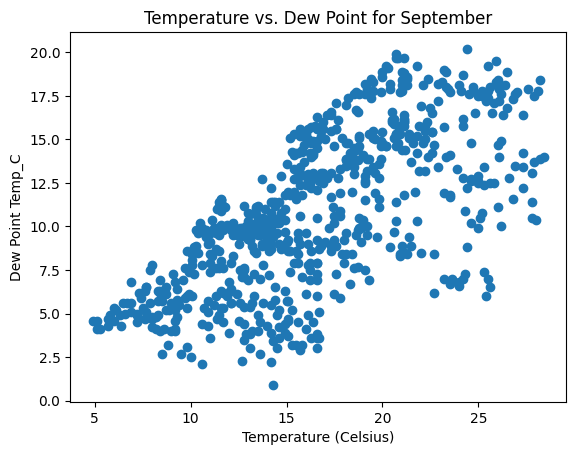

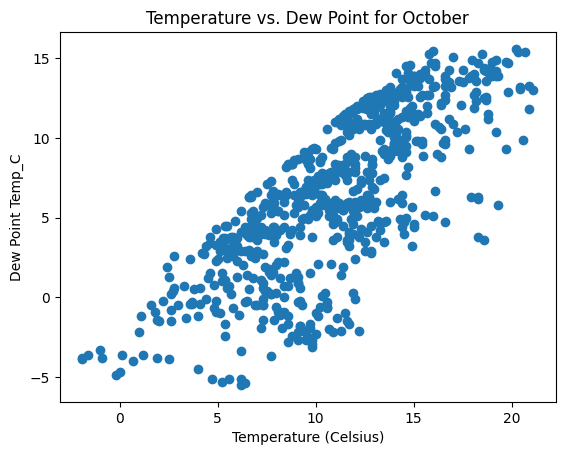

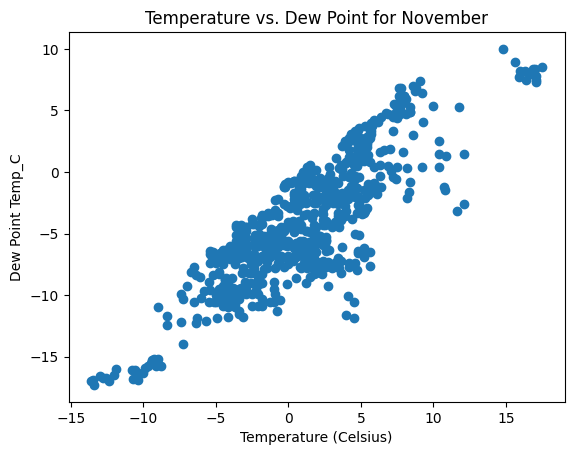

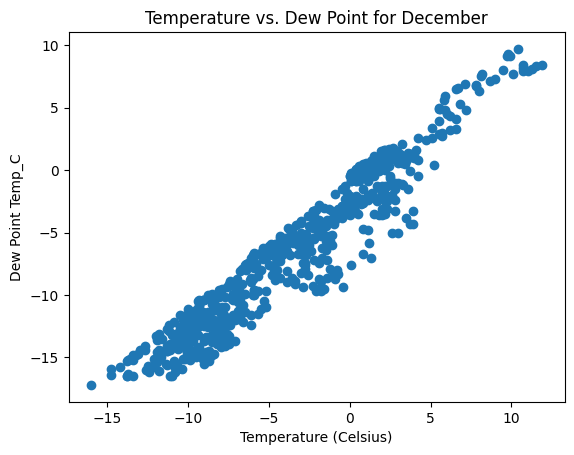

In [71]:
import calendar
for month in range(1, 13):
  month_data = weather_data[weather_data['Month'] == month]
  plt.figure()
  plt.scatter(month_data['Temp_C'], month_data['Dew Point Temp_C'])
  plt.title(f"Temperature vs. Dew Point for {calendar.month_name[month]}")
  plt.xlabel('Temperature (Celsius)')
  plt.ylabel('Dew Point Temp_C')
  plt.show()

The correlation between temperature and dew point is: 0.93


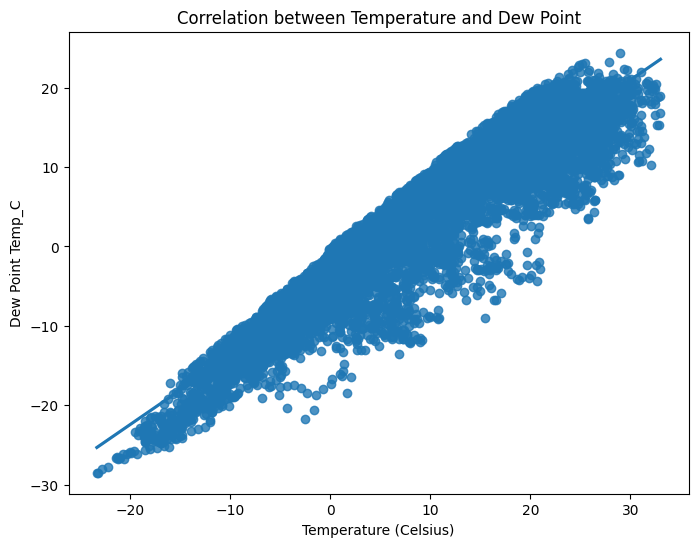

In [72]:
# Calculate the correlation coefficient
correlation = weather_data['Temp_C'].corr(weather_data['Dew Point Temp_C'])

print(f"The correlation between temperature and dew point is: {correlation:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Temp_C', y='Dew Point Temp_C', data=weather_data)
plt.title('Correlation between Temperature and Dew Point')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Dew Point Temp_C')
plt.show()


A correlation coefficient of 0.93 between temperature and dew point indicates a very strong positive relationship. This means that as the temperature increases, the dew point also tends to increase.

## Insights and Conclusions

### Key Insights:
* Temperature and dew point temperature are highly correlated, indicating redundancy.
* Outliers in weather parameters might be crucial for identifying extreme weather events.
* Seasonal trends in weather parameters are evident and can be useful for understanding local climate patterns.
* The negative correlation between temperature and humidity could have implications for weather prediction models.

### Practical Applications:
* These insights can be useful in developing weather prediction models, especially considering seasonal patterns and correlations between weather parameters.
* Understanding the variability and trends in weather conditions can help in planning for agriculture, construction, and other weather-dependent activities.

## Recommendation for further analysis
* Outlier Detection and Treatment:By investigating the identified outliers in the data we can analyze their potential causes and decide if they should be removed or handled using appropriate techniques (e.g., capping, winsorizing).

* Feature Engineering: Exploring creating new features based on existing data to reduce multicollinearity between features.

* Predictive Modeling: we can predict future weather conditions by building machine learning models using the dataset